# ML Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path="final_processed_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head() 

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.14,3.0,-0.02885,1.49,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.67,0.0,-0.02885,14.19,1,1,9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.82,0.0,-0.02885,20.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.05,0.0,-0.02885,8.19,1,1,9,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [3]:
X = df.drop(columns=['estimated_stock_pct'])
y = df['estimated_stock_pct']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8676, 28)
(2169, 28)
(8676,)
(2169,)


## Regression

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.22214875353773159


## Support Vector Machine

In [6]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.2223035308218988


## Neural Network

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from sklearn.metrics import mean_absolute_error
input_layer = layers.Input(shape=(X_train.shape[1],))

dense_layer1 = layers.Dense(64, activation='relu')(input_layer)
dense_layer2 = layers.Dense(64, activation='relu')(dense_layer1)
output_layer = layers.Dense(1)(dense_layer2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mae')

model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Epoch 1/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3812 - val_loss: 0.2349
Epoch 2/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2437 - val_loss: 0.2539
Epoch 3/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2427 - val_loss: 0.2379
Epoch 4/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2319 - val_loss: 0.2305
Epoch 5/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2317 - val_loss: 0.2286
Epoch 6/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2331 - val_loss: 0.2261
Epoch 7/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2308 - val_loss: 0.2248
Epoch 8/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2347 - val_loss: 0.2263
Epoch 9/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2292 - val_loss: 0.2272
Epoch 10/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2303 - val_loss: 0.2254
Epoch 11/100
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2281 - val_loss: 0.2275
Epoch 12/100
272/272 ━━━━━━━━━━━━━━━━━━━━

## Random Forest Regressor

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
split=0.75
accuracy = []
for fold in range(0, 10):
  model = RandomForestRegressor()
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  trained_model = model.fit(X_train, y_train)


  y_pred = trained_model.predict(X_test)

  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.237
Fold 2: MAE = 0.237
Fold 3: MAE = 0.236
Fold 4: MAE = 0.236
Fold 5: MAE = 0.238
Fold 6: MAE = 0.237
Fold 7: MAE = 0.237
Fold 8: MAE = 0.236
Fold 9: MAE = 0.237
Fold 10: MAE = 0.236
Average MAE: 0.24


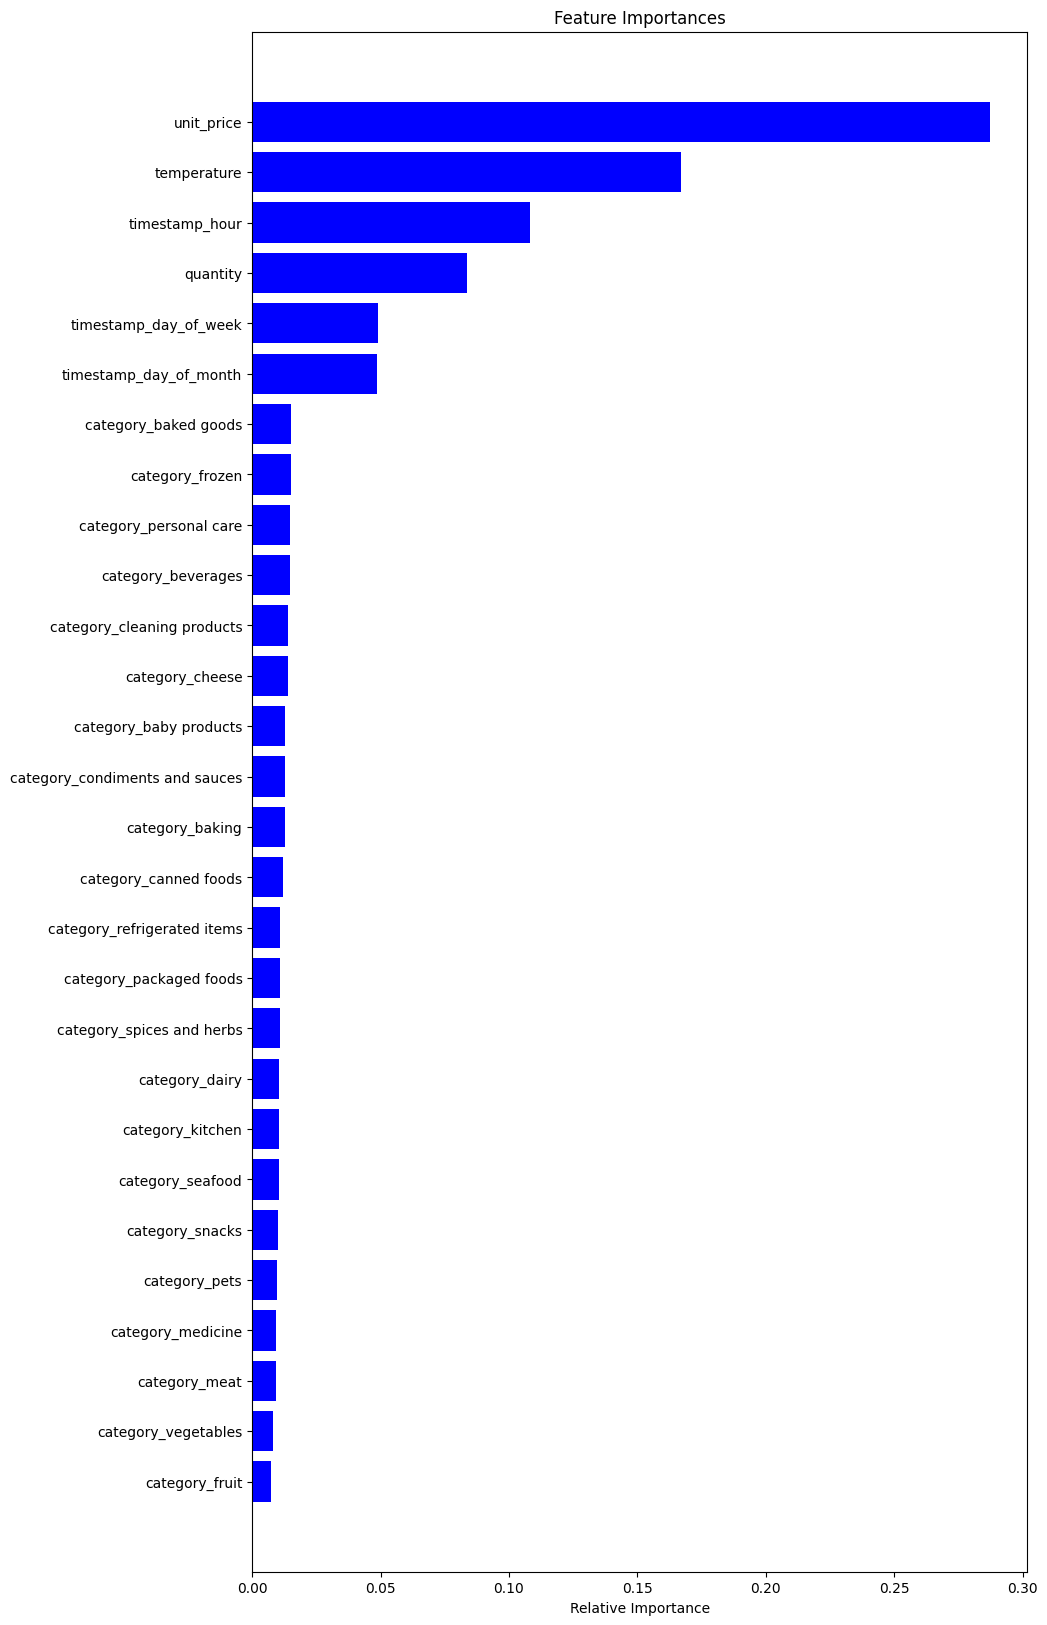

In [9]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()